In [1]:
from diffcam.util import LOGPATH, load_pickle, RECONSTRUCTIONPATH, DATAPATH
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.image as mpimg
import os
import cv2
import collections

In [2]:
def load_data(name, and_contain = ['p'], or_contain = ['p'],  not_contains = ['zzzz']):
    files = []
    files.extend(glob.glob(os.path.join(LOGPATH,name),recursive=True))

    pickles = []
    for f in files:
        if all(x in f for x in and_contain):
            if any(x in f for x in or_contain):
                if not any(x in f for x in not_contains):
                    pickles.append(load_pickle(f))
        
    return pickles

#algo_pickle = load_data("ridge*.pkl")
#all_pickle = load_data("*.pkl")

In [3]:
# Grab first level information

def get_data_from_dict(pickle):
    lambda_ = []
    algo = []
    delta = []
    mse = []
    psnr = []
    ssim = []
    lpips = []
    mse_mean = []
    psnr_mean = []
    ssim_mean = []
    lpips_mean = []
    n_iter = []
    images = ['img1_rgb', 'img3_rgb', 'img4_rgb', 'img5_rgb', 'img6_rgb', 'img7_rgb', 'img8_rgb']
    lenseless = []

    for save in pickle:
        algo.append(save['algo'])
        lambda_.append(save['lambda'])
        delta.append(save['delta'])
        mse.append(save['mse'])
        psnr.append(save['psnr'])
        ssim.append(save['ssim'])
        lpips.append(save['lpips'])
        mse_mean.append(sum(save['mse'])/len(save['mse']))
        psnr_mean.append(sum(save['psnr'])/len(save['psnr']))
        ssim_mean.append(sum(save['ssim'])/len(save['ssim']))
        lpips_mean.append(sum(save['lpips'])/len(save['lpips']))
        n_iter.append(save['n_iter'])

        fp = []
        for im in images:
            try:
                fp.append(save[im]['recon_fp'])
            except:
                pass
        lenseless.append(fp)
    return lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless

In [4]:
def get_photo(path, color = False):
    end = os.path.split(path)[-1]
    path = os.path.join(RECONSTRUCTIONPATH, end)
    data = mpimg.imread(path)
    if color:
        data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
    return data

In [ ]:
one_first_runs_pickle = load_data("ridge*.pkl", ['100', '291229'],['p'],['1000'])
lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless = get_data_from_dict(one_first_runs_pickle)

In [ ]:
gt = []
for i in range(1,9):
    gt.append(os.path.join(DATAPATH,'our_images','lensed',f'img{i}_original.png'))

run = len(lenseless)
fig, ax = plt.subplots(run+1, 7, figsize=(18,15))
ax[0,0].imshow(cv2.cvtColor(cv2.imread(gt[0]), cv2.COLOR_BGR2RGB))
ax[0,1].imshow(cv2.cvtColor(cv2.imread(gt[2]), cv2.COLOR_BGR2RGB))
ax[0,2].imshow(cv2.cvtColor(cv2.imread(gt[3]), cv2.COLOR_BGR2RGB))
ax[0,3].imshow(cv2.cvtColor(cv2.imread(gt[4]), cv2.COLOR_BGR2RGB))
ax[0,4].imshow(cv2.cvtColor(cv2.imread(gt[5]), cv2.COLOR_BGR2RGB))
ax[0,5].imshow(cv2.cvtColor(cv2.imread(gt[6]), cv2.COLOR_BGR2RGB))
ax[0,6].imshow(cv2.cvtColor(cv2.imread(gt[7]), cv2.COLOR_BGR2RGB))
for i in range(0,run):
    for j in range(len(lenseless[i])):
        ax[i+1,j].imshow(get_photo(lenseless[i][j]))
        ax[i+1, 0].set_ylabel(f"{algo[i]}_{lambda_[i]}")

for i in range(0,run+1):
    for j in range(len(lenseless[i])):      
        ax[i, j].xaxis.set_visible(False)
        plt.setp(ax[i, j].spines.values(), visible=False)
        ax[i, j].tick_params(left=False, labelleft=False)
        ax[i, j].patch.set_visible(False)
        plt.tight_layout()
plt.show()

In [ ]:
pickle1000 = load_data("*.pkl", ['1000', '291229'],['pls_huber', 'pls', 'lasso', '.1', '.2', '.3',], ['1e'])
lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless = get_data_from_dict(pickle1000)

In [ ]:
lenseless = list(np.array(lenseless)[[2,6,8,0,7,3,4,5,1]])
algo = list(np.array(algo)[[2,6,8,0,7,3,4,5,1]])
lambda_ = list(np.array(lambda_)[[2,6,8,0,7,3,4,5,1]])

In [ ]:
gt = []
for i in range(1,9):
    gt.append(os.path.join(DATAPATH,'our_images','lensed',f'img{i}_original.png'))

run = len(lenseless)
plt.figure(figsize = (3,2))
fig = plt.imshow(cv2.cvtColor(cv2.imread(gt[0]), cv2.COLOR_BGR2RGB))
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

fig, ax = plt.subplots(3, 3, figsize=(8,6))
for i in range(len(lenseless)):
    ax[i//3, i%3].imshow(get_photo(lenseless[i][0], color=True))
    ax[i//3, i%3].set_title(f"{algo[i]}_{lambda_[i]}")   
    ax[i//3, i%3].xaxis.set_visible(False)
    plt.setp(ax[i//3, i%3].spines.values(), visible=False)
    ax[i//3, i%3].tick_params(left=False, labelleft=False)
    ax[i//3, i%3].patch.set_visible(False)
    plt.tight_layout()
plt.show()

In [ ]:
first_runs_pickle = load_data("*.pkl", ['100', '291229'],['p'],['1000'])
lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless = get_data_from_dict(first_runs_pickle)

In [ ]:
# Will Likely not work as above

def heatmap(metric, algo, lambda_, delta, metric_name):
    a = {metric_name:metric, "algo": algo, "lambda_":lambda_, "delta":delta, "n_iter":n_iter}
    df = pd.DataFrame(a)

    df_huber = df[(df['algo']=='pls_huber') & (df['n_iter'] == 100)]
    df = df[df['algo']!='pls_huber']

    df = df.pivot(index='lambda_', columns="algo", values=metric_name)

    sns.heatmap(df, annot=True, fmt="f", cbar_kws={'label': metric_name}, cmap="vlag")
    plt.show()
    df_huber = df_huber.pivot("lambda_","delta",metric_name)
    sns.heatmap(df_huber, annot=True, fmt="f", cbar_kws={'label': metric_name}, cmap="vlag")
    plt.show()
    
heatmap(mse_mean, algo, lambda_, delta, "mse")

In [ ]:
algo_lambda = [i +"_"+ str(j) for i, j in zip(algo, lambda_)]
image_order = [['img8_rgb', 'img1_rgb', 'img3_rgb', 'img6_rgb', 'img7_rgb','img5_rgb','img4_rgb']]*len(mse)

In [ ]:
a = {'mse':mse, "algo_lambda":algo_lambda, "n_iter":n_iter, "image_order": image_order}
df = pd.DataFrame(a)

df = df[~(df['algo_lambda'].str.contains('pls_huber'))]
df = df.explode(['mse', 'image_order'])

df = df.pivot('algo_lambda', "image_order", "mse").reset_index(drop=False)

In [ ]:
g = sns.PairGrid(df,
                 x_vars=df.columns[1:], y_vars=['algo_lambda'],
                 height=10, aspect=.25)
g.map(sns.stripplot, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(.05, .6), xlabel="MSE", ylabel="")

# Use semantically meaningful titles for the columns
titles = ['img8_rgb', 'img1_rgb', 'img3_rgb', 'img6_rgb', 'img7_rgb','img5_rgb','img4_rgb']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [39]:
# Grab first level information

def get_data_from_dict(pickle):
    lambda_ = []
    algo = []
    delta = []
    mse = []
    psnr = []
    ssim = []
    lpips = []
    mse_mean = []
    psnr_mean = []
    ssim_mean = []
    lpips_mean = []
    n_iter = []
    images = ['img1_rgb', 'img3_rgb', 'img4_rgb', 'img5_rgb', 'img6_rgb', 'img7_rgb', 'img8_rgb']
    lenseless = []
    process_time = []

    for save in pickle:
        algo.append(save['algo'])
        lambda_.append(save['lambda'])
        delta.append(save['delta'])
#         mse.append(save['mse'])
#         psnr.append(save['psnr'])
#         ssim.append(save['ssim'])
#         lpips.append(save['lpips'])
        mse_mean.append(sum(save['mse'])/len(save['mse']))
        psnr_mean.append(sum(save['psnr'])/len(save['psnr']))
        ssim_mean.append(sum(save['ssim'])/len(save['ssim']))
        lpips_mean.append(sum(save['lpips'])/len(save['lpips']))
        n_iter.append(save['n_iter'])

        fp = []
        m = []
        p = []
        s = []
        l = []
        time = []
        for im in images:
            try:
                fp.append(save[im]['recon_fp'])
                m.append(save[im]['mse'])
                p.append(save[im]['psnr'])
                s.append(save[im]['ssim'])
                l.append(save[im]['lpips'])
                time.append(save[im]['process_time'])
            except:
                pass
        lenseless.append(fp)
        mse.append(m)
        psnr.append(p)
        ssim.append(s)
        lpips.append(l)
        process_time.append(time)
    return lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless, process_time

In [40]:
final_runs_pickle = load_data("*.pkl", ['1000'], ['lasso', 'glasso', 'ridge', 'nnls', 'admm'], ['.1','.2','.3'])

In [41]:
save_final_runs_pickle = []
for p in final_runs_pickle:
    try:
        p['img4_rgb']
        save_final_runs_pickle.append(p)
    except:
        print(p['algo'])

nnls
ridge
ridge
nnls
ridge
ridge
lasso
lasso
lasso
glasso
ridge
lasso
lasso
lasso
ridge
glasso
nnls
nnls
glasso
nnls
nnls
glasso
glasso
glasso


In [42]:
save_final_runs_pickle[0], save_final_runs_pickle[1] = save_final_runs_pickle[1], save_final_runs_pickle[0]

In [43]:
lambda_, algo, delta, mse, psnr, ssim, lpips, mse_mean, psnr_mean, ssim_mean, lpips_mean, n_iter, images, lenseless, process_time = get_data_from_dict(save_final_runs_pickle)

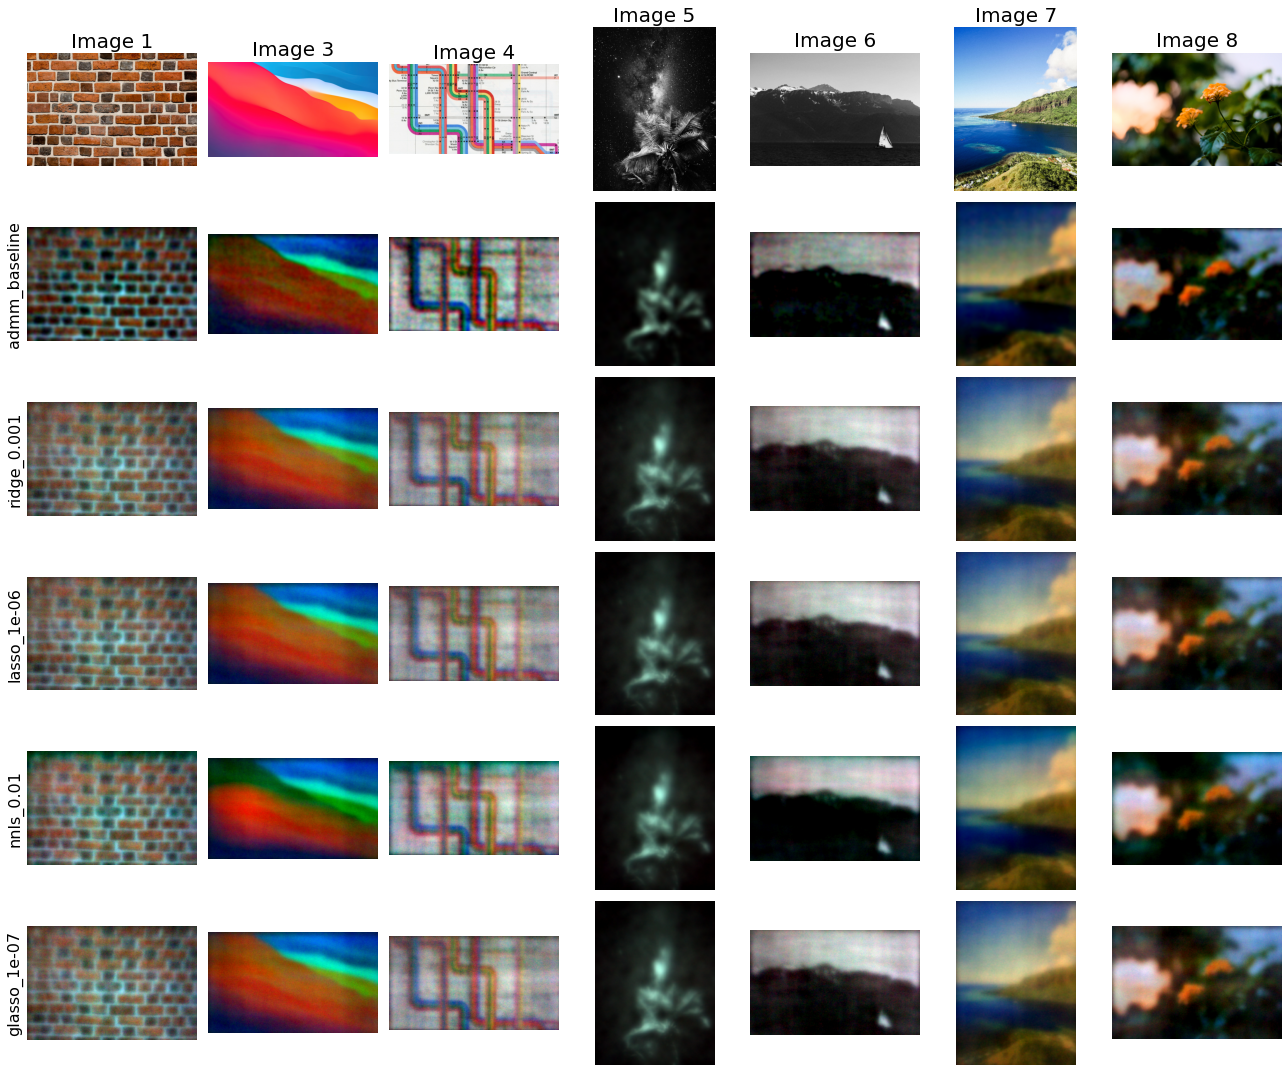

In [31]:
gt = []
for i in range(1,9):
    gt.append(os.path.join(DATAPATH,'our_images','lensed',f'img{i}_original.png'))

run = len(lenseless)
fig, ax = plt.subplots(run+1, 7, figsize=(18,15))
ax[0,0].imshow(cv2.cvtColor(cv2.imread(gt[0]), cv2.COLOR_BGR2RGB))
ax[0,0].set_title('Image 1', fontsize=20)
ax[0,1].imshow(cv2.cvtColor(cv2.imread(gt[2]), cv2.COLOR_BGR2RGB))
ax[0,1].set_title('Image 3', fontsize=20)
ax[0,2].imshow(cv2.cvtColor(cv2.imread(gt[3]), cv2.COLOR_BGR2RGB))
ax[0,2].set_title('Image 4', fontsize=20)
ax[0,3].imshow(cv2.cvtColor(cv2.imread(gt[4]), cv2.COLOR_BGR2RGB))
ax[0,3].set_title('Image 5', fontsize=20)
ax[0,4].imshow(cv2.cvtColor(cv2.imread(gt[5]), cv2.COLOR_BGR2RGB))
ax[0,4].set_title('Image 6', fontsize=20)
ax[0,5].imshow(cv2.cvtColor(cv2.imread(gt[6]), cv2.COLOR_BGR2RGB))
ax[0,5].set_title('Image 7', fontsize=20)
ax[0,6].imshow(cv2.cvtColor(cv2.imread(gt[7]), cv2.COLOR_BGR2RGB))
ax[0,6].set_title('Image 8', fontsize=20)
for i in range(0,run):
    for j in range(len(lenseless[i])):
        ax[i+1,j].imshow(get_photo(lenseless[i][j]))
        if algo[i] == 'admm':
            ax[i+1, 0].set_ylabel(f"{algo[i]}_baseline", fontsize=16)
        else:
            ax[i+1, 0].set_ylabel(f"{algo[i]}_{lambda_[i]}", fontsize=16)

for i in range(0,run+1):
    for j in range(7):      
        ax[i, j].xaxis.set_visible(False)
        plt.setp(ax[i, j].spines.values(), visible=False)
        ax[i, j].tick_params(left=False, labelleft=False)
        ax[i, j].patch.set_visible(False)
        plt.tight_layout()
plt.show()

In [44]:
def calc_average(lst):
    new = []
    for val in lst:
        new.append(sum(val)/len(val))
    return new

In [46]:
mse = calc_average(mse)
psnr = calc_average(psnr)
ssim = calc_average(ssim)
lpips = calc_average(lpips)
process_time = calc_average(process_time)

In [54]:
a = {"algo":algo,"mean mse":mse, "mean psnr":psnr,"mean ssim":ssim, "mean lpips":lpips, "time (s)":process_time}

In [55]:
df = pd.DataFrame(a)

In [56]:
df = df.set_index('algo')

In [57]:
df['time (s)'] = df['time (s)'].round(1)

In [60]:
df

,mean mse,mean psnr,mean ssim,mean lpips,time (s)
algo,,,,,
admm,0.097258,10.971058,0.344614,0.643235,44.4
ridge,0.061894,13.199550,0.480487,0.618882,1402.5
lasso,0.061943,13.195581,0.479841,0.618768,1214.3
nnls,0.075608,12.422622,0.412996,0.615286,1167.4
glasso,0.061795,13.204670,0.481097,0.618561,1458.2


In [61]:
admm = load_data('admm*.pkl', ['None'])

In [62]:
admm

[{'data': 'our_images',
  'psf_fp': '/Users/alecflowers/Documents/EPFL/2021_fall/signal_processing/DiffuserCam/data/psf/psf_rgb_ours.png',
  'algo': 'admm',
  'gray': False,
  'lambda': 1,
  'delta': 1,
  'n_iter': None,
  'mse': [0.07900688467849638,
   0.08505248177462305,
   0.07415744138304058,
   0.06055936856407606,
   0.11823586861758453,
   0.14844842889420354,
   0.14227780024210707,
   0.11768952120823674,
   0.17480352704666505,
   0.18657961078220767,
   0.15402594714853568,
   0.14126786123316026,
   0.06497433515141546,
   0.05705394232098671,
   0.05023072835161181,
   0.032462343936755796,
   0.1233288877161795,
   0.1745181808340845,
   0.1485246122586984,
   0.10722256926735745,
   0.020524123758155353,
   0.02616517093007812,
   0.021777793498979684,
   0.018274581702156564,
   0.21626968407030703,
   0.2125238258465374,
   0.17029934080274256,
   0.13704520838475948],
  'psnr': [11.023350625373665,
   10.70313009443547,
   11.298452628494822,
   12.178186617538076,


In [ ]:
def get_data_from_dict(pickle):
    images = ['img1_rgb', 'img3_rgb', 'img4_rgb', 'img5_rgb', 'img6_rgb', 'img7_rgb', 'img8_rgb']
    
    lambda_ = []
    algo = []
    delta = []
    
    mse = []
    psnr = []
    ssim = []
    lpips = []
    n_iter = []
    lenseless = []
    process_time = []

    for save in pickle:
        algo.append(save['algo'])
        lambda_.append(save['lambda'])
        delta.append(save['delta'])

        fp = []
        m = []
        p = []
        s = []
        l = []
        time = []
        for im in images:
            pic = save[im]

    return lambda_, algo, delta,